<a href="https://colab.research.google.com/github/impragya08/Learn_Tensorflow/blob/main/Tensorflow_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Fundamental Concepts of tensors using **TensorFlow**

Topics covered-
* Introduction to tensors
* Getting information from tensors
* Manipulating tensors
* Tensors & Numpy
* Using @tf.function (a way to speed up your regular Python functions)
* Using GPUs and TPUs
* Exersises

# **Introduction to Tensors![Screenshot_(2)[1].png](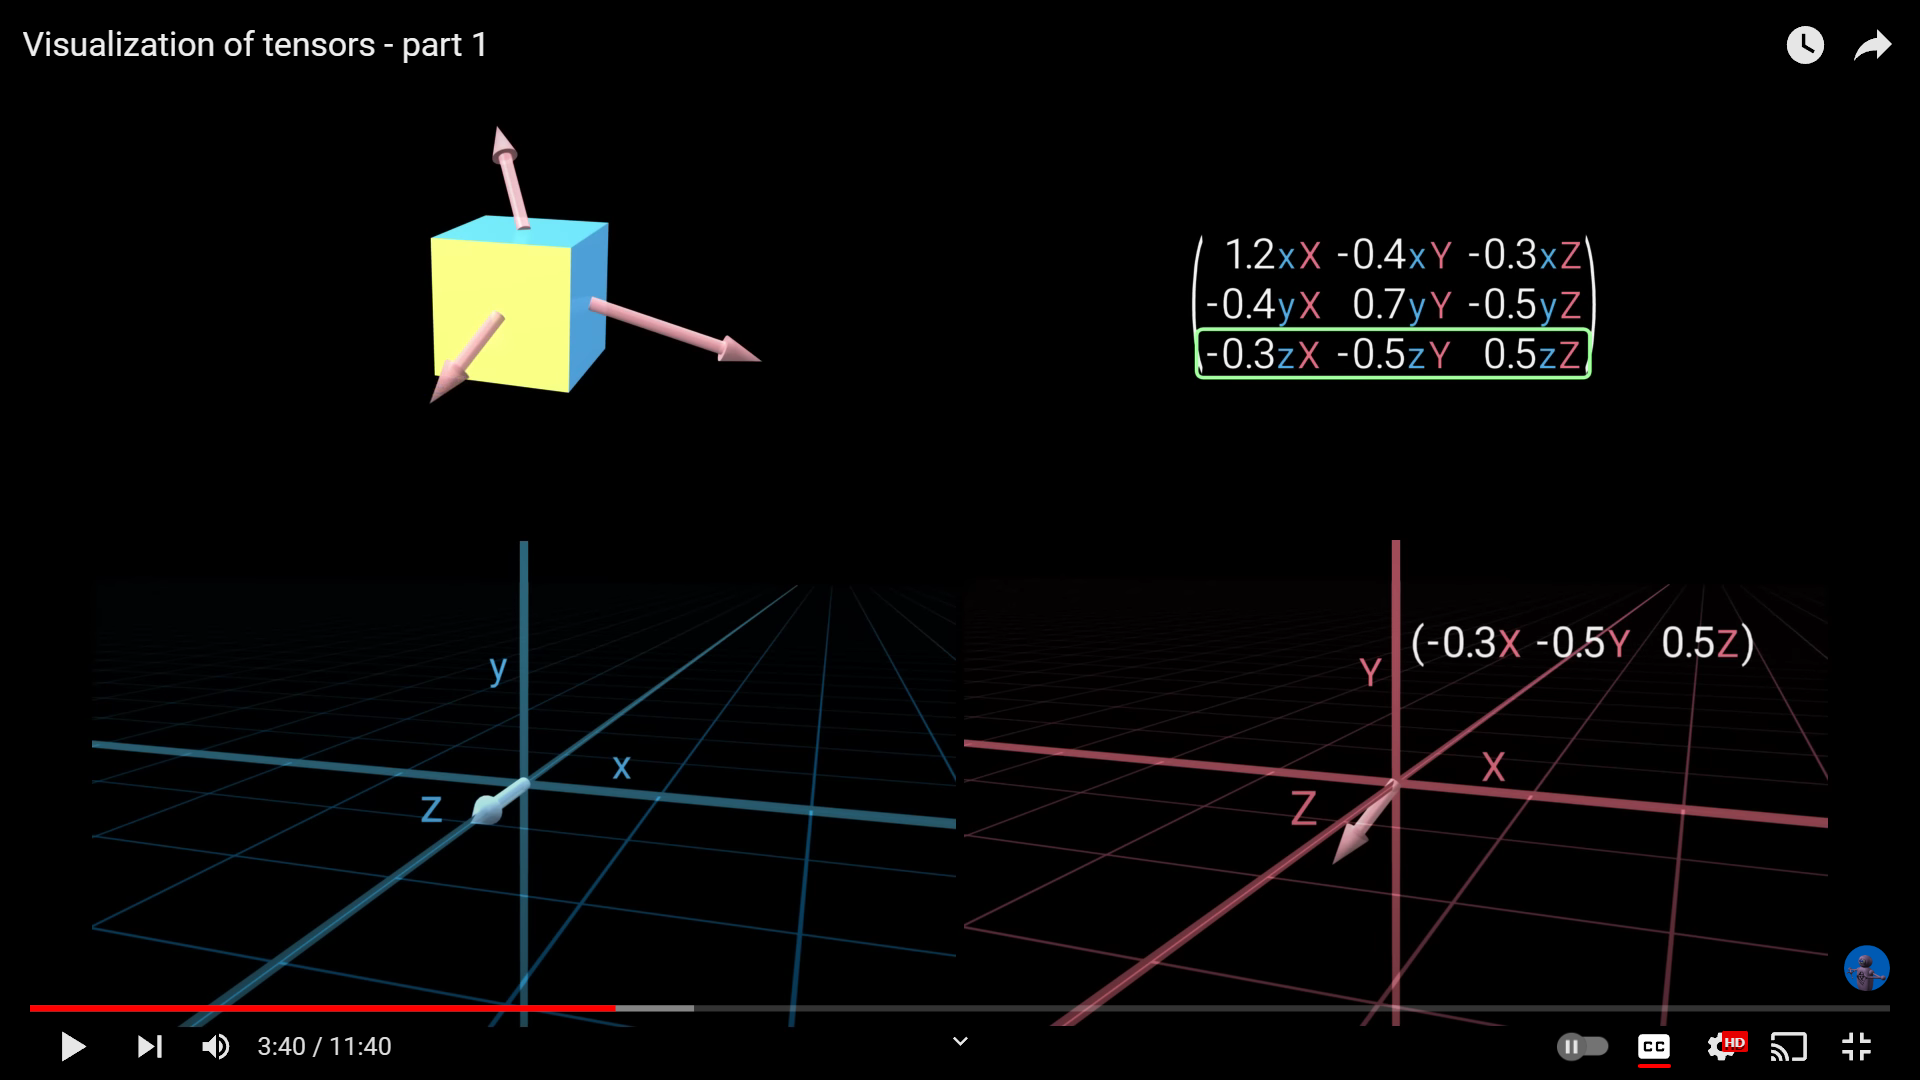)

> Indented block



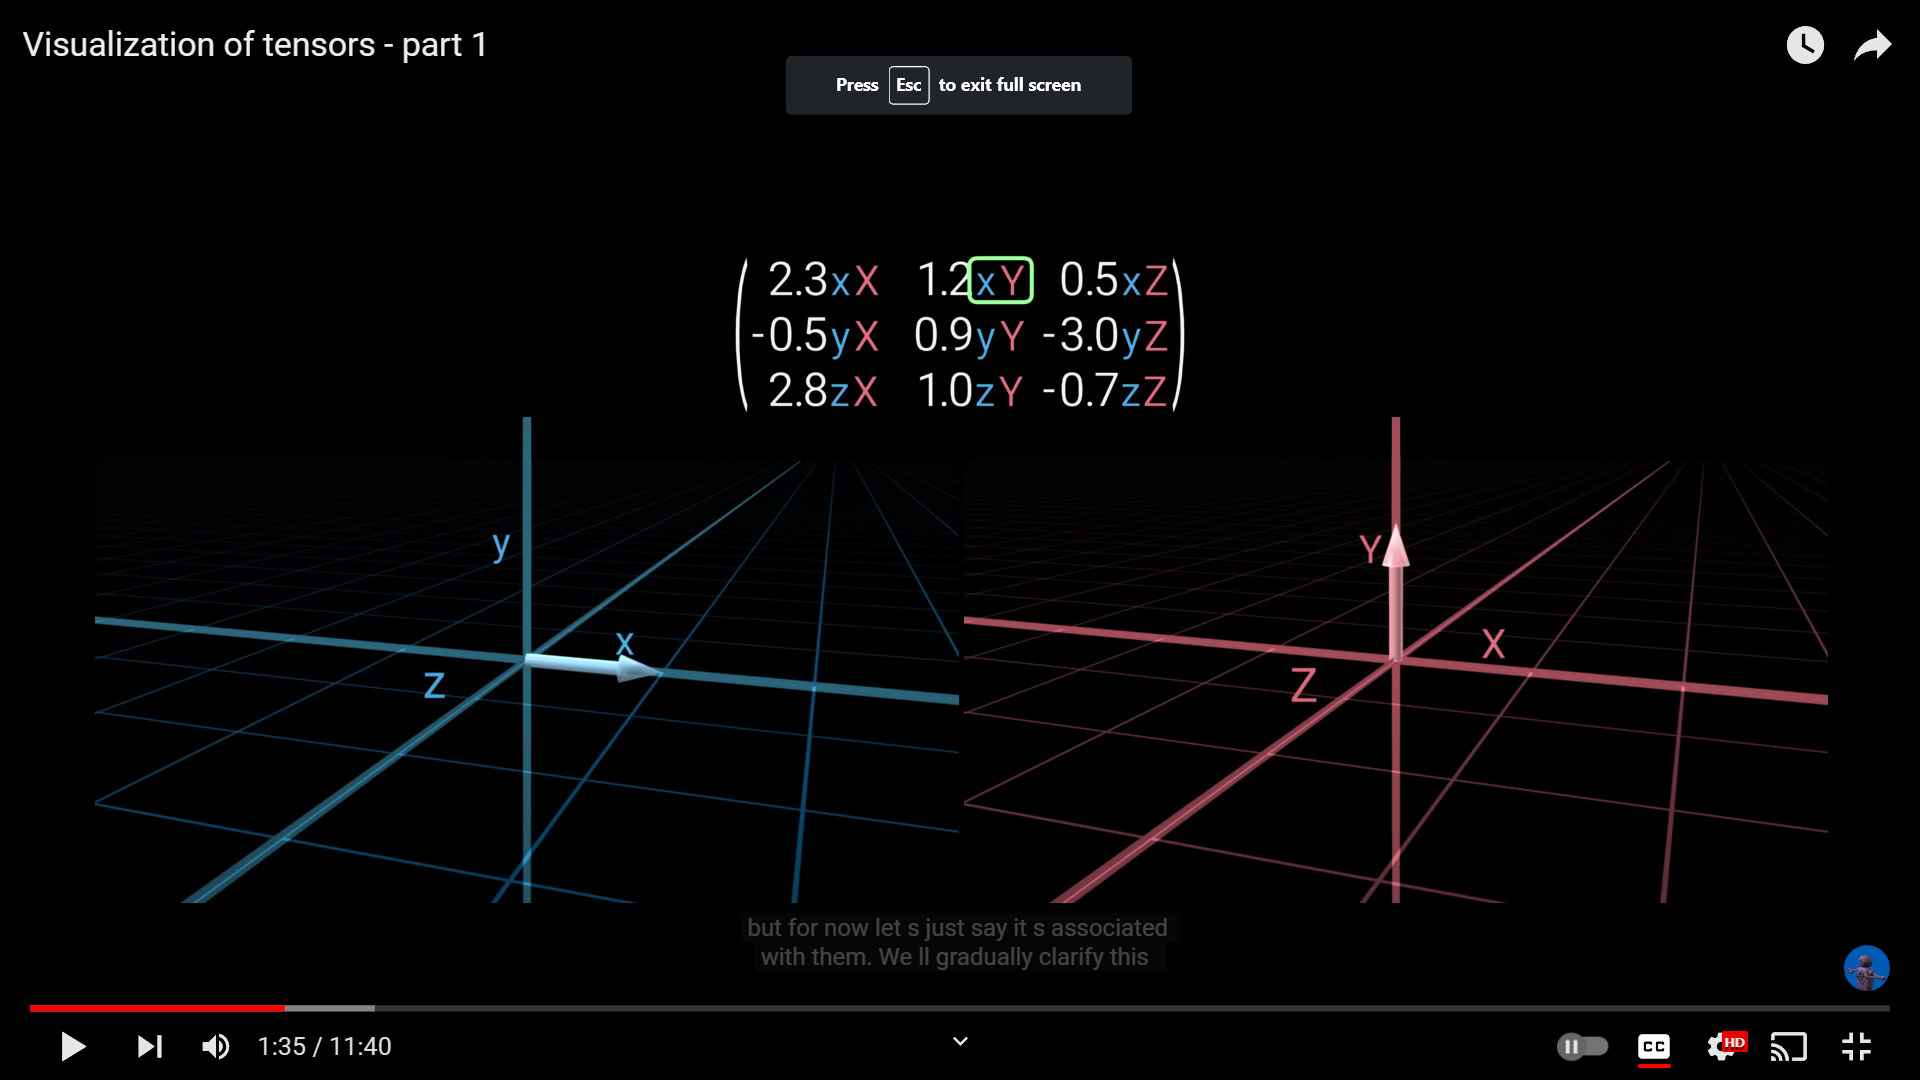


# **Importing Tensor Flow as tf**

In [ ]:
#Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.11.0


# **Creating Tensor**

In [ ]:
#Creating Tensors with tf.constant()
scalar= tf.constant(7)
scalar


<tf.Tensor: shape=(), dtype=int32, numpy=7>

# Number of dimensions of a tensor 

In [ ]:
# Check the number of dimensions of a tensor
scalar.ndim

0

# Creating Vector

In [ ]:
#Create a vector
vector= tf.constant([10,10])
vector
#Output:
#<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 10], dtype=int32)>

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 10], dtype=int32)>

In [ ]:
#Check dimension of vector
vector.ndim
#Output: 1

1

# Creating a Matrix

In [ ]:
#Create a matrix (has more than 1 dimensions)
matrix= tf.constant([[10,7],
                    [7,10]])
matrix
#Output:
#<tf.Tensor: shape=(2, 2), dtype=int32, numpy=array([[10,  7],[ 7, 10]], dtype=int32)>
#for shape we have two items inside one dimension

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 7, 10]], dtype=int32)>

#Creating matrix by defining data type

In [ ]:
#Creating another matrix
another_matrix=tf.constant([[10.,7.],
                            [3.,2.],
                            [4.,5.]], dtype=tf.float16) #specify the data tyoe with dtype parameter
another_matrix

<tf.Tensor: shape=(3, 2), dtype=float16, numpy=
array([[10.,  7.],
       [ 3.,  2.],
       [ 4.,  5.]], dtype=float16)>

# Number of dimensions of another_matrix

In [ ]:
another_matrix.ndim

2

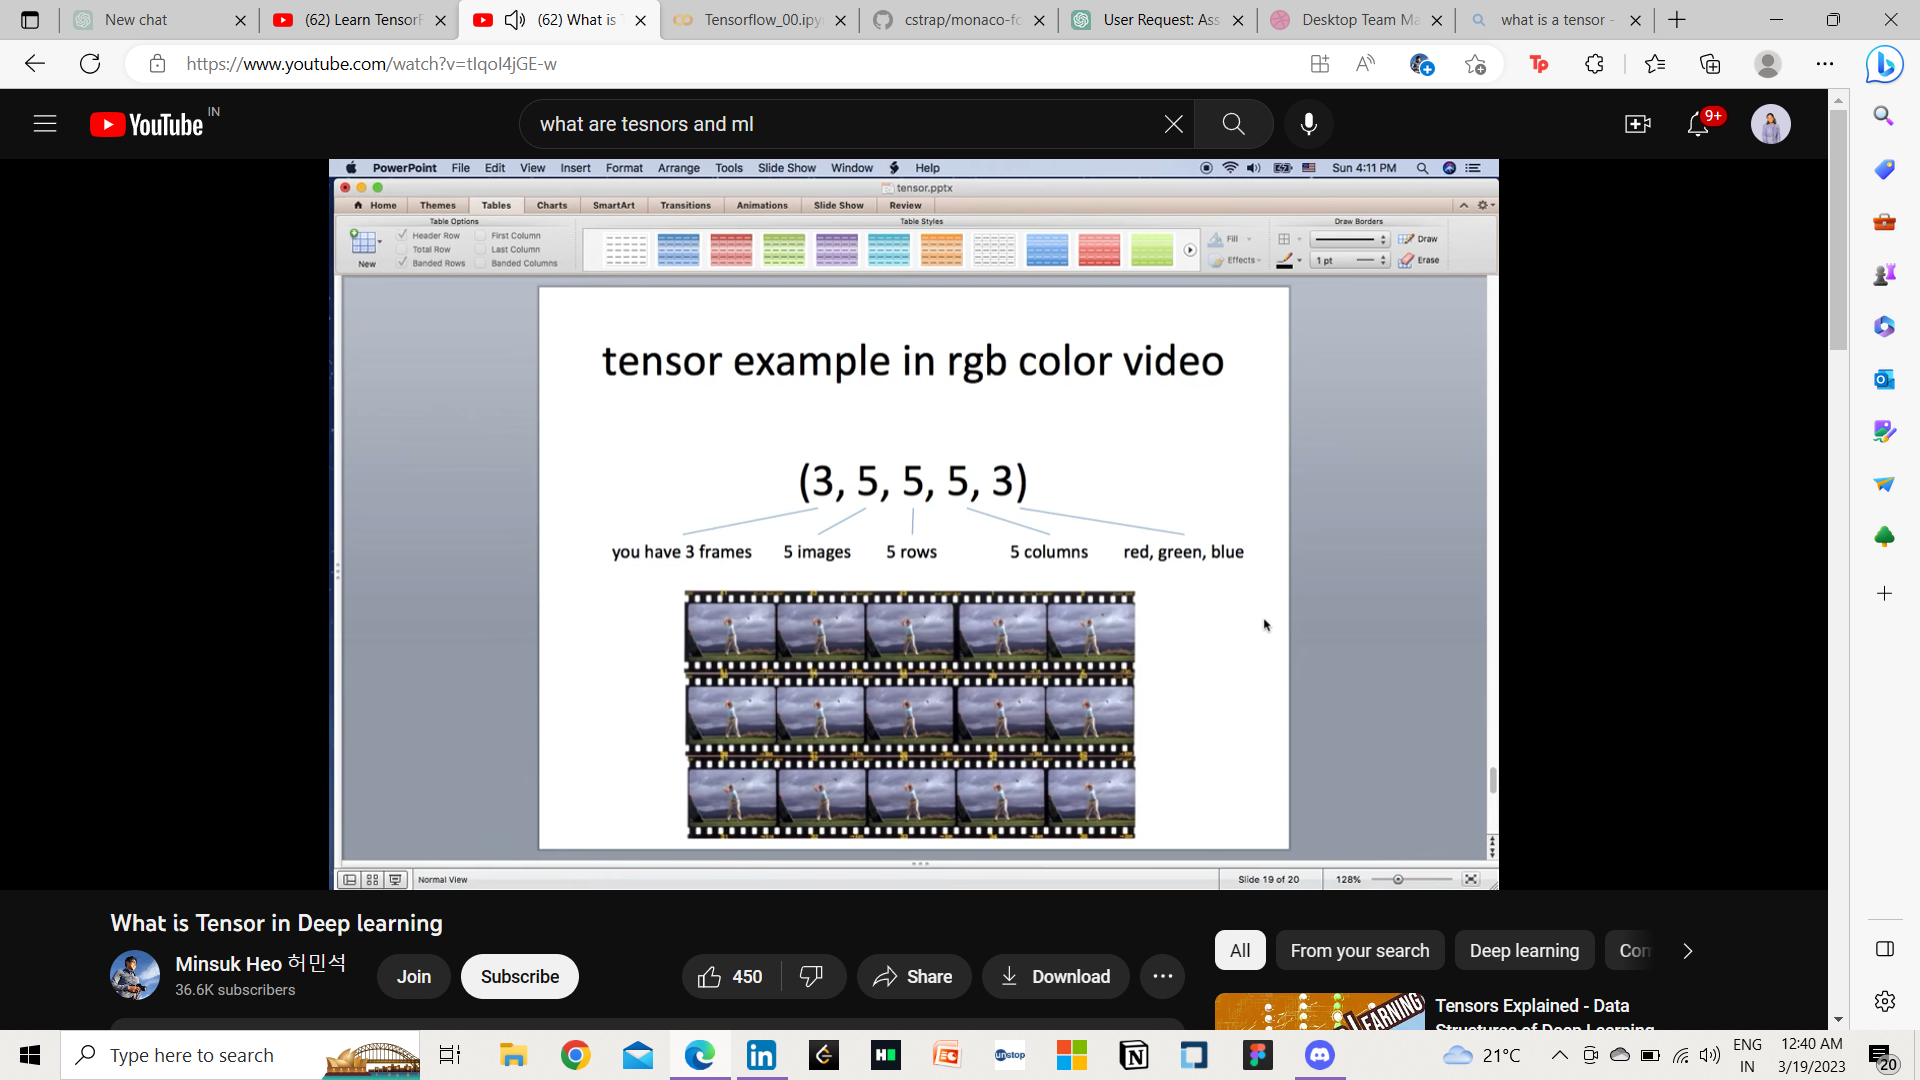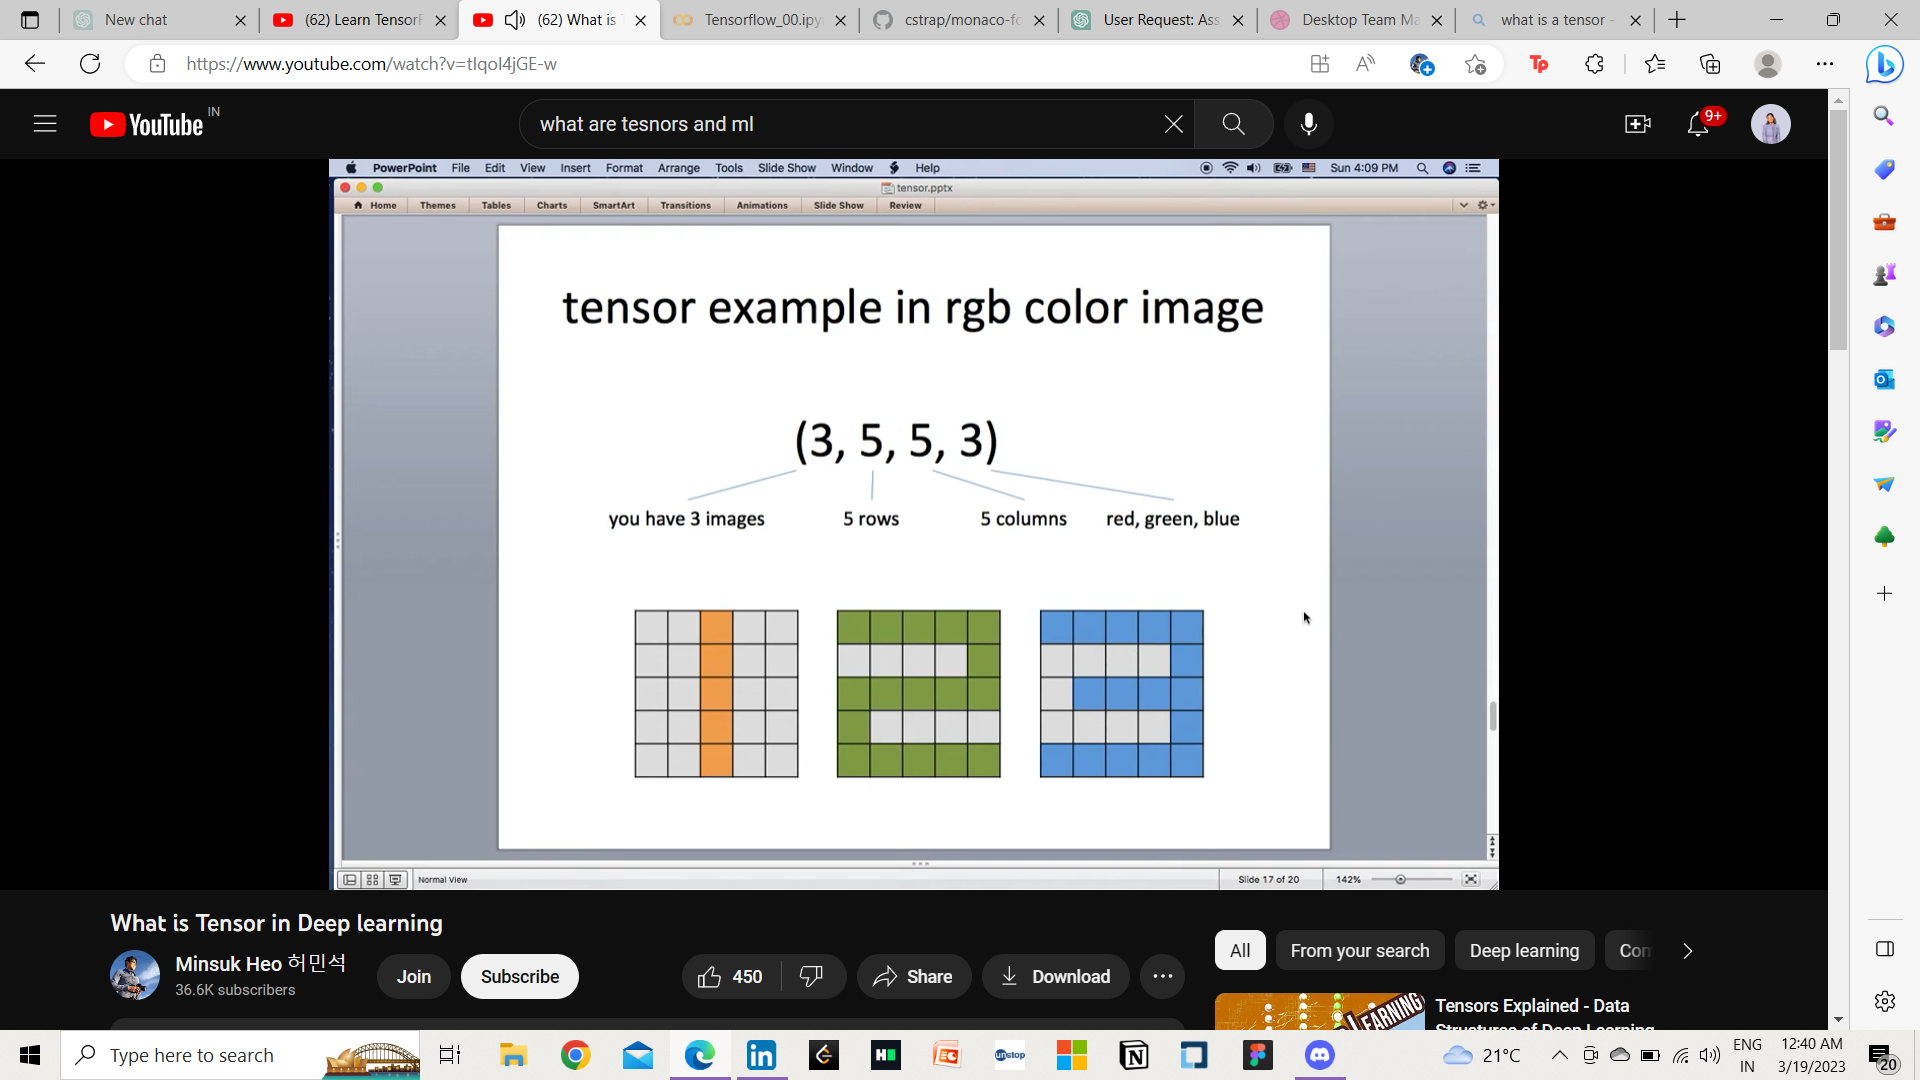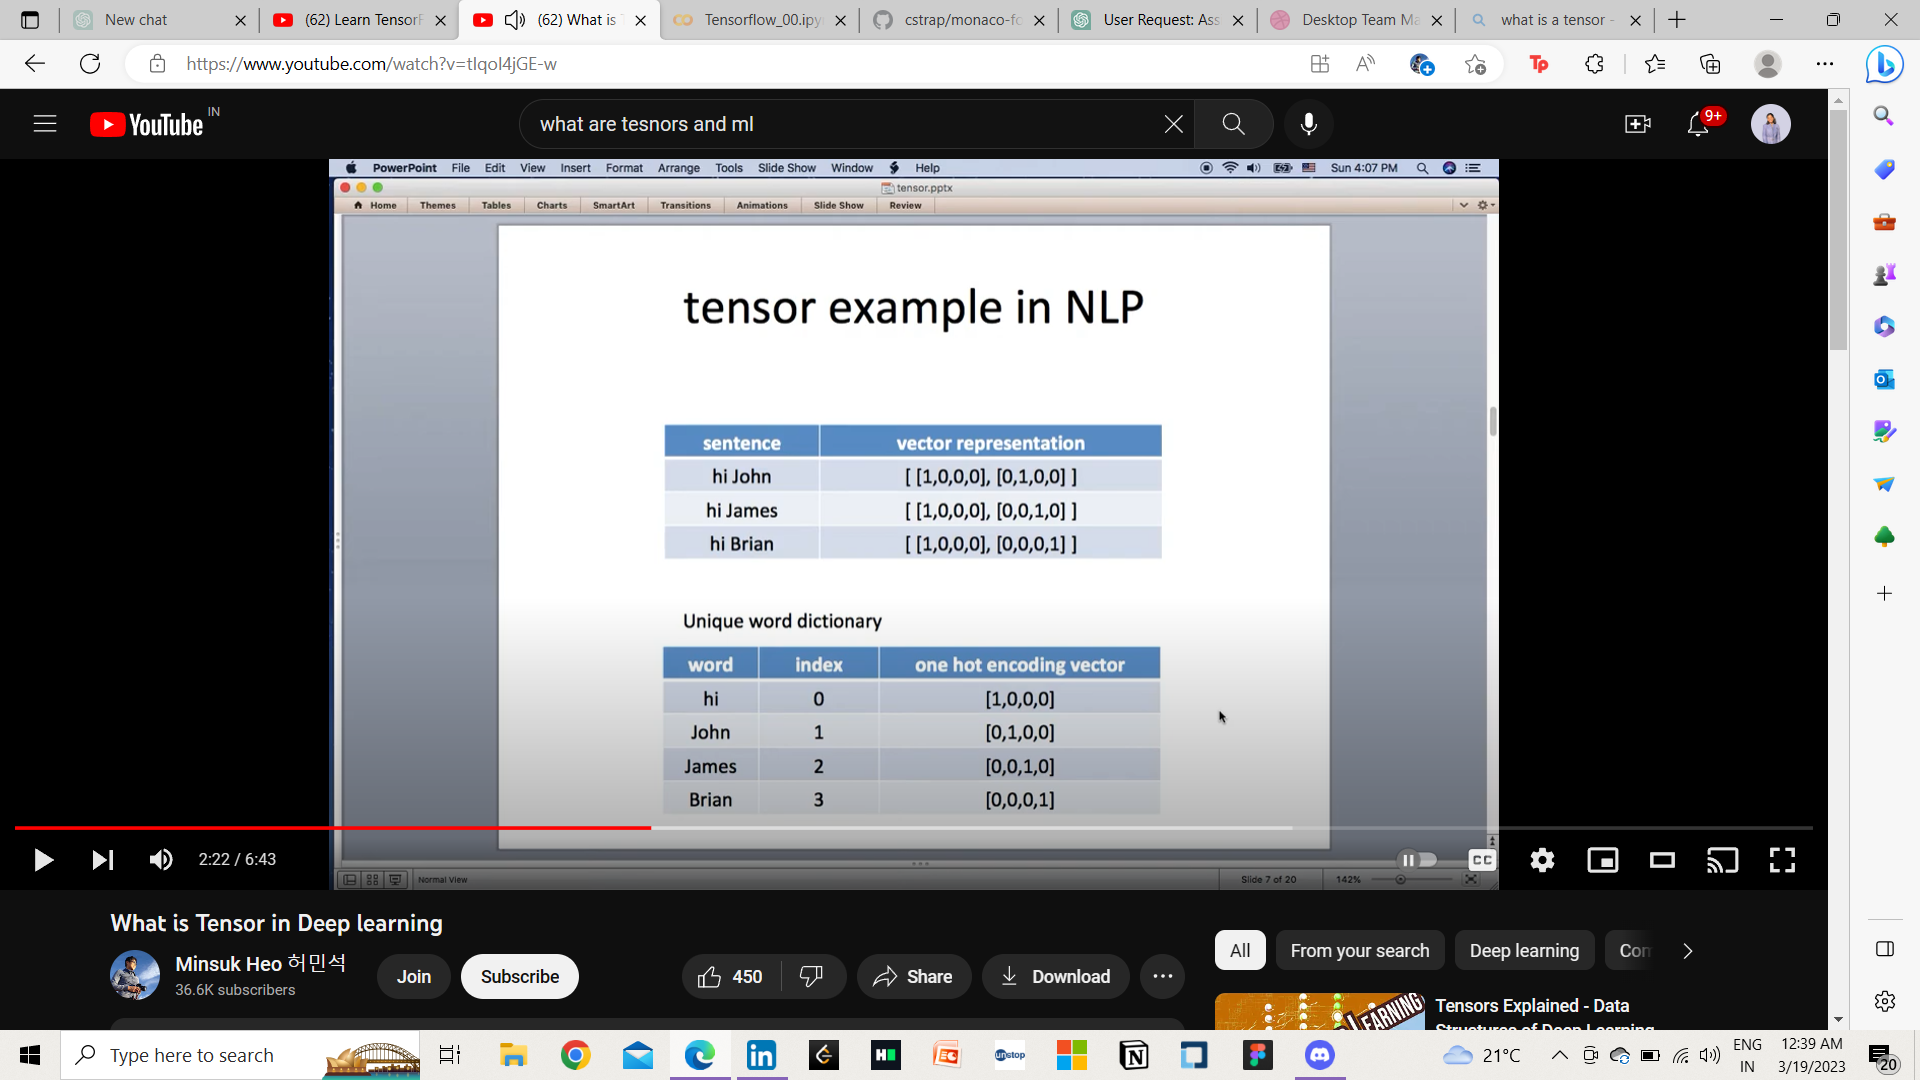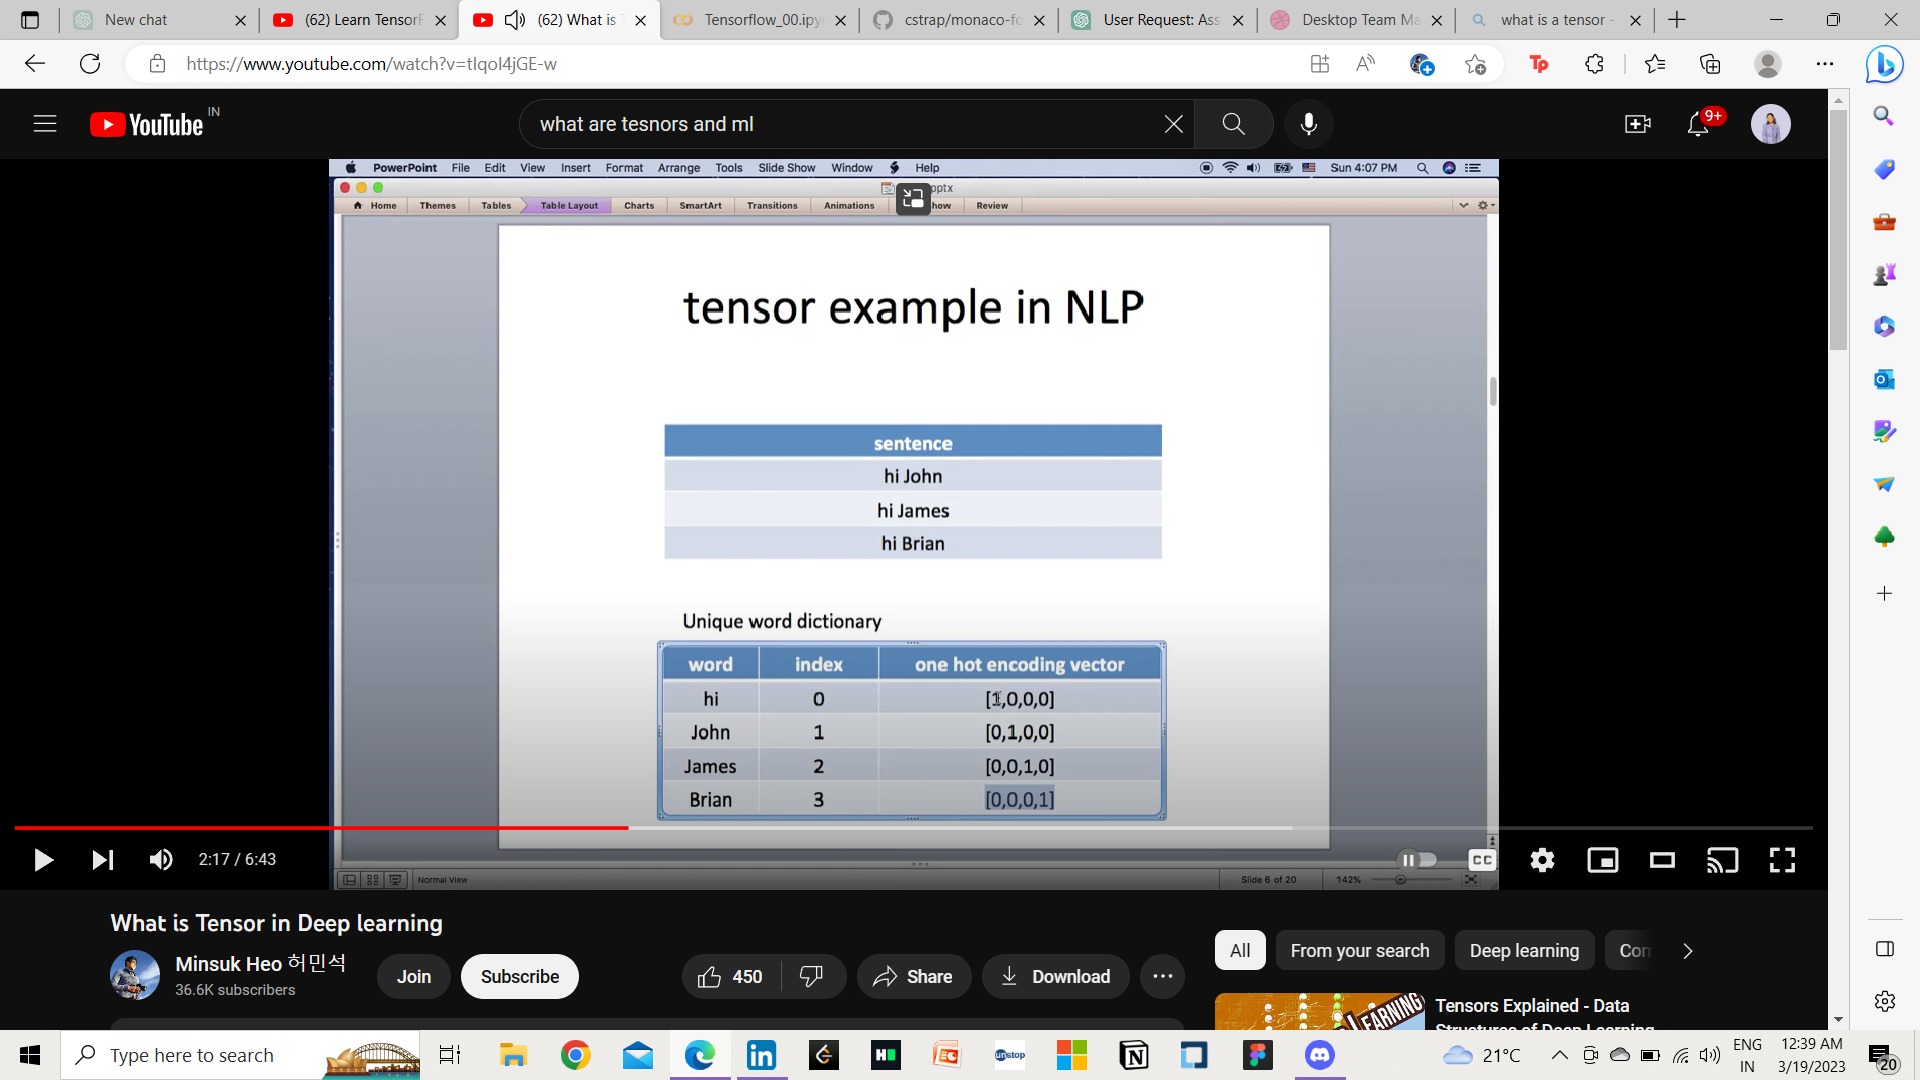# Creating Tensor with tf.constant

In [ ]:
tensor= tf.constant([[[1,2,3,],
                    [4,5,6,] ],
                    [[7,8,9,],
                     [13,10,12]],
                   [[10,11,12,],
                    [2,3,4]],
                     [[1,2,3,],
                      [1,2,3]]])
tensor
#shape(4,2,3)
#4-[[],[]]*4
#2-[[],[]]*2 in each dimension
#3-[,,,]

<tf.Tensor: shape=(4, 2, 3), dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [13, 10, 12]],

       [[10, 11, 12],
        [ 2,  3,  4]],

       [[ 1,  2,  3],
        [ 1,  2,  3]]], dtype=int32)>

# Number of dimensions

In [ ]:
tensor.ndim

3

*What we've created*
*Scalar: a single number 

1.   List item
2.   List item


*Vector: a number with direction (e.g wind speed and direction of wind)
*Matrix: a 2-dimensional array of numbers
*Tensor: an n-dimensional array of numbers(n can be any number)
         0-dimensional tensor: Scalar
         1-dimensional tensor Vector 

Screenshot (4).png     

# Creating Tensors with tf.Variable

In [ ]:
tf.Variable
#Creating the same tensor with tf.Variable() as above
changeable_tensor=tf.Variable([10,10])
unchangeable_tensor=tf.constant([10,7])
changeable_tensor, unchangeable_tensor

(<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([10, 10], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([10,  7], dtype=int32)>)

In [ ]:
#Let's try and change one of the elements in changeable_tensor
changeable_tensor[0]=7
#ERROR!

TypeError: ignored

In [ ]:
#Trying .assign()
changeable_tensor[0].assign(7)
changeable_tensor

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([ 7, 10], dtype=int32)>

In [ ]:
#Let's try and change one of the elements in unchangeable_tensor
unchangeable_tensor[0]   #Prints the element at 0


# Creating Random Tensors
*Random Tensors are tensors of some arbritary size which contains some random numbers*

Steps:
1.   Initially the neural networks starts with random weigths intialized.(only in beggining)
2.  Show Examplses
3. Update representation outputs
4. Repeat with more examples

In [11]:
#Create two random tensors(but the same)
random_1=tf.random.Generator.from_seed(42)   #set seed for reproducibility
random_1= random_1.normal(shape=(3,2))   
random_1

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[-0.7565803 , -0.06854702],
       [ 0.07595026, -1.2573844 ],
       [-0.23193763, -1.8107855 ]], dtype=float32)>

In [13]:
random_2=tf.random.Generator.from_seed(42)
random_2=random_2.normal(shape=(3,2))
random_2
#Are the equal?
random_1==random_2

<tf.Tensor: shape=(3, 2), dtype=bool, numpy=
array([[ True,  True],
       [ True,  True],
       [ True,  True]])>


#**Code** **Explanation**
random_2=tf.random.Generator.from_seed(42): This line creates a new TensorFlow random number generator object called random_2 using the tf.random.Generator.from_seed() function. The from_seed() function takes an integer seed value and returns a new generator object that will produce a sequence of random numbers based on that seed. In this case, the seed value is 42.

random_2=random_2.normal(shape=(3,2)): This line generates a 3x2 array of random numbers using the normal() method of the random_2 generator object. The normal() method produces random numbers from a normal (Gaussian) distribution with mean 0 and standard deviation 1. The shape parameter specifies the shape of the array to be generated, which in this case is (3,2).

random_2: This line simply prints the array of random numbers generated by the previous line.*

# Shuffling the order of random tensors
*Shuffling the elements why?*

-first 1000 images=ramen last 100 to eggs it will consecutively learn ramen hence we do shuffling to make model learn simultaneously.

In [16]:
#Shuffle the tensor (valuable for when you want to shuffle the data so the inherent order dosen't effect learning)
not_shuffled=tf.constant([[10,7],
                         [3,4],
                         [2,5]])
#Shuffle our not_shuffled tensor
tf.random.shuffle(not_shuffled) #Shuffled along 1 dimension #Everytime you run it there will be diff output
tf.random.shuffle(not_shuffled, seed=42) #Everytime you run it there will be diff output'


<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4],
       [ 2,  5]], dtype=int32)>

>Rule 4:
If both the global and the operation seed are set: Both seeds are used in conjunction to determine the random sequence.

In [17]:
#BUT
tf.random.set_seed(42) #global level random seed
tf.random.shuffle(not_shuffled, seed=42) #Everytime you run it there will not be diff output'  #operational level random seed


<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4],
       [ 2,  5]], dtype=int32)>

# Other ways to make Tensors using *Numpy*

In [18]:
#Create tensors of alll ones
tf.ones([10,7])

<tf.Tensor: shape=(10, 7), dtype=float32, numpy=
array([[1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.]], dtype=float32)>

In [20]:
#Create tensors of all zeroes
tf.zeros(shape=(3,4))

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)>

Turn Numpy arrays into Tensors
The main differnce between NumPy Arrays and Tensors is that tensors can be run on a GPU(much faster, for numerical computing).

In [24]:
#Turning Numpy arrays into Tensors
import numpy as np
numpy_A= np.arange(1,25 , dtype=np.int32)   #create a NumpPy array between 1 and 25
numpy_A
#X=tf.constant (some_matrix) #capital for matrix or tensor
#y= tf.constant(vector) #non-captial for vector


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int32)

In [28]:
#Converting NumPy array into tensor
A= tf.constant(numpy_A)
A

#Changing into 3 dimensional tensor
A=tf.constant(numpy_A, shape = (2,3,4))